## Laboratorio No.7
### Le Net5 
- Paola de León 20361
- Gabriela Contreras 20213

In [1]:
# Imports
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


In [2]:
# Cargar y procesar los datos 
transform = transforms.Compose(
    [ transforms.Resize((32, 32)), transforms.RandomRotation(10) ,transforms.RandomHorizontalFlip(), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform)

test_set = torchvision.datasets.MNIST(
    root=".", train=False, download=True, transform=transform)

In [4]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=batch_size, shuffle=False)

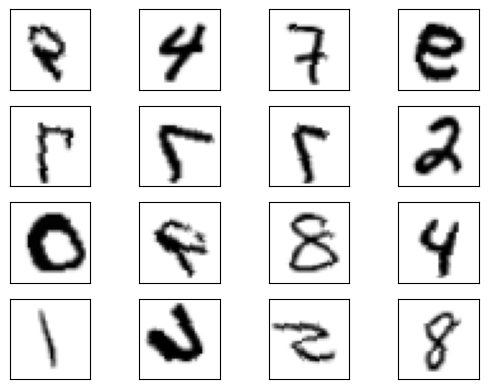

In [5]:
# Mostrar los datos ya cargados
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(32, 32), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [6]:
#Defining the convolutional neural network
# Modelo basado en https://blog.paperspace.com/writing-lenet5-from-scratch-in-python/

class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super(LeNet5, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.6)

        self.fc2 = nn.Linear(120, 84)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.6)

        self.fc3 = nn.Linear(84, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.7)
        
        self.fc4 = nn.Linear(64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.dropout3(out)
        out = self.fc4(out)
        
        return out

In [7]:
device = "cpu"
num_epochs = 15
num_classes = 10
learning_rate = 0.001

model = LeNet5(num_classes).to(device)
# Definir el optimizador con regularización L2
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

# loss function
cost = nn.CrossEntropyLoss()

#optimizer y learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
for epoch in range(num_epochs):
    correct = 0
    total = 0
    running_loss = 0.0  # Inicializar la pérdida acumulativa para esta época
    
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward
        outputs = model(images)
        loss = cost(outputs, labels)
        
        # Backward y optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # Acumular la pérdida
        running_loss += loss.item()

    average_loss = running_loss / len(train_loader)
    accuracy = correct / total
    print ('Epoch {}, Loss: {:.4f}, Accuracy: {:.4f}' 
                .format(epoch, average_loss, accuracy)) 

Epoch 0, Loss: 1.3061, Accuracy: 0.5339
Epoch 1, Loss: 0.7425, Accuracy: 0.7545
Epoch 2, Loss: 0.6515, Accuracy: 0.7837
Epoch 3, Loss: 0.5900, Accuracy: 0.8069
Epoch 4, Loss: 0.5634, Accuracy: 0.8190
Epoch 5, Loss: 0.5333, Accuracy: 0.8312
Epoch 6, Loss: 0.5055, Accuracy: 0.8475
Epoch 7, Loss: 0.4853, Accuracy: 0.8566
Epoch 8, Loss: 0.4871, Accuracy: 0.8633
Epoch 9, Loss: 0.4675, Accuracy: 0.8697
Epoch 10, Loss: 0.4608, Accuracy: 0.8723
Epoch 11, Loss: 0.4458, Accuracy: 0.8777
Epoch 12, Loss: 0.4325, Accuracy: 0.8809
Epoch 13, Loss: 0.4246, Accuracy: 0.8852
Epoch 14, Loss: 0.4181, Accuracy: 0.8853


In [13]:
# Establecer el modelo en el modo de evaluación
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # predicciones del modelo
        outputs = model(images)
        
        # Obtiene la clase predicha
        _, predicted = torch.max(outputs.data, 1)

        # Actualizar 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * (correct / total)
    print('Accuracy on test: {:.2f}%'.format(accuracy))

Accuracy on test: 93.36%
